##  Word Frequency Analysis *(詞頻分析)*  
We use `FreqDist` from NLTK to count how many times each token appears in the text.  
This produces a **frequency distribution** that shows which words are used most often.

>  使用 NLTK 的 FreqDist 統計詞頻，找出文本中最常出現的單字。

---

##  Sentiment Analysis  *(情緒分析)*  
We use **TextBlob** to analyze the **sentiment** of a passage.  
It provides two scores:
- `polarity` (ranging from -1 to +1): negative to positive emotion  
- `subjectivity` (ranging from 0 to 1): objective to subjective tone

> TextBlob 可分析文字是正面還是負面，以及語氣是否主觀。

---

##  Word Cloud Generation *(詞雲視覺化)*   
We generate a **word cloud** using the `WordCloud` library.  
The word cloud **visually represents word frequency**:  
→ Words that appear more often are displayed in **larger fonts**.

>  詞雲圖會將常見詞放大顯示，幫助快速了解文本核心字詞。



In [ ]:
# Step 1: Import and download the Gutenberg corpus （匯入並下載 gutenberg 語料庫）

import nltk
nltk.download('gutenberg')  # Download the Gutenberg corpus (只需下載一次)
from nltk.corpus import gutenberg  # Import the corpus interface


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [ ]:
#  List available books

print(gutenberg.fileids())  # Show all available Gutenberg text files in the corpus
# 顯示所有內建的 Gutenberg 書籍檔案名稱

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [ ]:
# Select two different Texts (genres)(選擇兩本不同風格的書)

import nltk
from nltk.corpus import gutenberg

# Download corpus
nltk.download('gutenberg')
nltk.download('punkt')

# Load two different types of texts
text1_raw = gutenberg.raw('milton-paradise.txt')  # Novel
print(text1_raw[:250])  # Preview the first 250 characters

text2_raw = gutenberg.raw('shakespeare-macbeth.txt')     # Religious
print(text2_raw[:250])  # Preview the first 250 characters


[Paradise Lost by John Milton 1667] 
 
 
Book I 
 
 
Of Man's first disobedience, and the fruit 
Of that forbidden tree whose mortal taste 
Brought death into the World, and all our woe, 
With loss of Eden, till one greater Man 
Restore us, and regai
[The Tragedie of Macbeth by William Shakespeare 1603]


Actus Primus. Scoena Prima.

Thunder and Lightning. Enter three Witches.

  1. When shall we three meet againe?
In Thunder, Lightning, or in Raine?
  2. When the Hurley-burley's done,
When the B


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Word Frequency Analysis**

 Using `FreqDist` from NLTK to count how many times each token appears in the text.

In [ ]:
# Import necessary NLTK libraries for word frequency analysis
# (套件用來清理文本、去除雜訊詞，並進行詞頻統計。)

import nltk
from nltk.probability import FreqDist  # For frequency distribution
from nltk.corpus import stopwords     # For removing common English stopwords
import string                         # For punctuation removal

In [ ]:
# Download required NLTK resources
#  download the stopword list and a tokenizer component. These resources are required for preprocessin
# 下載停用詞（如 "the", "is"）及標記符號（punkt）支援後續文字斷詞與清理。

nltk.download('punkt_tab')    # Fixes some tokenization issues (optional in newer versions)
nltk.download('stopwords')    # Download the list of common stopwords


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Define a text cleaning function
# This function tokenizes the text, lowercases all words, removes punctuation and stopwords, and returns clean tokens.
# 將文字切詞、轉為小寫、去除標點與停用詞，留下有意義的單字。

stop_words = set(stopwords.words('english'))        # Define stopwords set
punct = set(string.punctuation)                     # Define punctuation set

def clean_text(raw):
    tokens = nltk.word_tokenize(raw.lower())        # Tokenize and convert to lowercase
    return [w for w in tokens if w.isalpha() and w not in stop_words and w not in punct]


In [ ]:
# Clean the two texts
# Apply the cleaning function to both texts to prepare them for analysis.
# 清理函式: 處理兩本書的文本內容

text1_clean = clean_text(text1_raw)  # Apply cleaning to the first text
text2_clean = clean_text(text2_raw)  # Apply cleaning to the second text


In [ ]:
# Create frequency distributions for each book
# (建立詞頻分布表，計算每個字在書中出現的次數。

fdist1 = FreqDist(text1_clean)  # Count word frequencies for book 1
fdist2 = FreqDist(text2_clean)  # Count word frequencies for book 2


In [ ]:
# Show the top 10 most frequent words in both texts
# 列出 每本書最常出現的 10 個單字。
print(" Top 10 Words in paradise:")
print(fdist1.most_common(10))

print("\n Top 10 Words in macbeth:")
print(fdist2.most_common(10))


 Top 10 Words in paradise:
[('thou', 432), ('thy', 412), ('heaven', 408), ('thee', 358), ('thus', 318), ('shall', 283), ('god', 253), ('yet', 228), ('though', 217), ('earth', 215)]

 Top 10 Words in macbeth:
[('macb', 137), ('haue', 122), ('thou', 87), ('enter', 81), ('shall', 68), ('macbeth', 62), ('thee', 61), ('vpon', 60), ('macd', 58), ('yet', 57)]


In [ ]:
# Import necessary NLTK libraries for word frequency analysis
import nltk
from nltk.probability import FreqDist  # For frequency distribution
from nltk.corpus import stopwords     # For removing common English stopwords
import string                         # For punctuation removal


nltk.download('stopwords')

# Define cleaning function
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

def clean_text(raw):
  tokens = nltk.word_tokenize(raw.lower())
  return [w for w in tokens if w.isalpha() and w not in stop_words and w not in punct]

# Clean both texts
text1_clean = clean_text(text1_raw)
text2_clean = clean_text(text2_raw)

# Frequency distribution
fdist1 = FreqDist(text1_clean)
fdist2 = FreqDist(text2_clean)

print(" Top 10 Words in paradise:")
print(fdist1.most_common(10))

print("\n Top 10 Words in macbeth:")
print(fdist2.most_common(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 Top 10 Words in paradise:
[('thou', 432), ('thy', 412), ('heaven', 408), ('thee', 358), ('thus', 318), ('shall', 283), ('god', 253), ('yet', 228), ('though', 217), ('earth', 215)]

 Top 10 Words in macbeth:
[('macb', 137), ('haue', 122), ('thou', 87), ('enter', 81), ('shall', 68), ('macbeth', 62), ('thee', 61), ('vpon', 60), ('macd', 58), ('yet', 57)]


In [ ]:
import nltk
from nltk.probability import FreqDist  # For frequency distribution
from nltk.corpus import stopwords
import string

# **Download the missing 'punkt_tab' resource:**
nltk.download('punkt_tab')
nltk.download('stopwords')

# Define cleaning function
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

def clean_text(raw):
  tokens = nltk.word_tokenize(raw.lower())
  return [w for w in tokens if w.isalpha() and w not in stop_words and w not in punct]

# Clean both texts
text1_clean = clean_text(text1_raw)
text2_clean = clean_text(text2_raw)

# Frequency distribution
fdist1 = FreqDist(text1_clean)
fdist2 = FreqDist(text2_clean)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(" Top 10 Words in paradise:")
print(fdist1.most_common(10))

print("\n Top 10 Words in macbeth:")
print(fdist2.most_common(10))

 Top 10 Words in paradise:
[('thou', 432), ('thy', 412), ('heaven', 408), ('thee', 358), ('thus', 318), ('shall', 283), ('god', 253), ('yet', 228), ('though', 217), ('earth', 215)]

 Top 10 Words in macbeth:
[('macb', 137), ('haue', 122), ('thou', 87), ('enter', 81), ('shall', 68), ('macbeth', 62), ('thee', 61), ('vpon', 60), ('macd', 58), ('yet', 57)]


In [ ]:
print("Top 10 Words in paradise:")
for word, freq in fdist1.most_common(10):
    print(f"{word}: {freq}")

print("\nTop 10 Words in macbeth:")
for word, freq in fdist2.most_common(10):
    print(f"{word}: {freq}")


Top 10 Words in paradise:
thou: 432
thy: 412
heaven: 408
thee: 358
thus: 318
shall: 283
god: 253
yet: 228
though: 217
earth: 215

Top 10 Words in macbeth:
macb: 137
haue: 122
thou: 87
enter: 81
shall: 68
macbeth: 62
thee: 61
vpon: 60
macd: 58
yet: 57


In [ ]:
# The least frequent words (出現頻率最少的詞)
print("Bottom 10 Words in paradise:")
for word, freq in fdist1.most_common()[-10:]:
    print(f"{word}: {freq}")

print("\nBottom 10 Words in macbeth:")
for word, freq in fdist2.most_common()[-10:]:
    print(f"{word}: {freq}")


Bottom 10 Words in paradise:
wentest: 1
unwilling: 1
meteorous: 1
marish: 1
glides: 1
labourer: 1
adust: 1
parch: 1
hastening: 1
brand: 1

Bottom 10 Words in macbeth:
earles: 1
planted: 1
newly: 1
calling: 1
exil: 1
snares: 1
watchfull: 1
producing: 1
butcher: 1
finis: 1


**Sentiment Analysis**

Using TextBlob to analyze the sentiment of a passage. It provides two scores
1.	polarity (ranging from -1 to +1): negative to positive emotion
2.	subjectivity (ranging from 0 to 1): objective to subjective tone


In [ ]:
from textblob import TextBlob  # For sentiment analysis

# Analyze the sentiment of the first 500 characters
blob1 = TextBlob(text1_raw[:])
blob2 = TextBlob(text2_raw[:])

print(" paradise — Sentiment:")
print(blob1.sentiment)

print(" macbeth — Sentiment:")
print(blob2.sentiment)


 paradise — Sentiment:
Sentiment(polarity=0.13595692334900647, subjectivity=0.5242655399152154)
 macbeth — Sentiment:
Sentiment(polarity=0.14398887916809064, subjectivity=0.5238307607035199)


**Word Cloud Generation**

* Generating a word cloud using the WordCloud library.
* The word cloud visually represents the token frequencies.
* Tokens that appear more frequently are displayed in larger fonts.



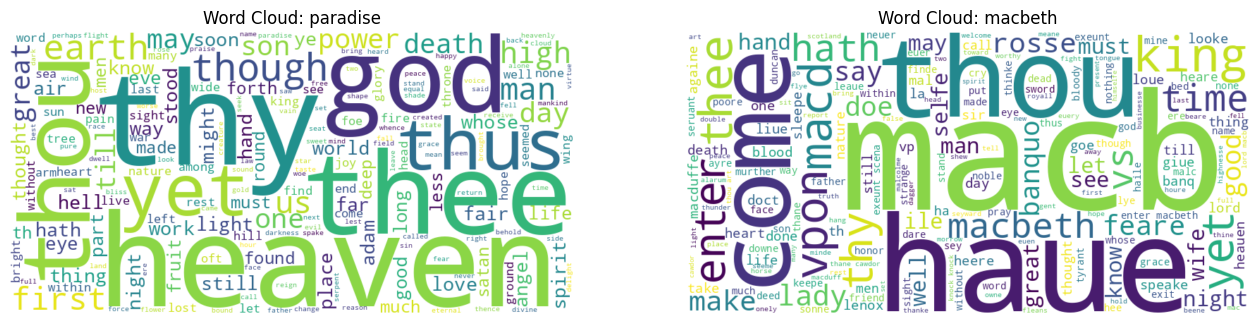

In [ ]:
from wordcloud import WordCloud  # For word cloud generation
import matplotlib.pyplot as plt  # For displaying the images

# Join cleaned words into one string
text1_str = " ".join(text1_clean)
text2_str = " ".join(text2_clean)

# Generate word clouds
wc1 = WordCloud(width=800, height=400, background_color='white').generate(text1_str)
wc2 = WordCloud(width=800, height=400, background_color='white').generate(text2_str)

# Display word clouds
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud: paradise")

plt.subplot(1, 2, 2)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud: macbeth")

plt.show()



Which words are largest in each word cloud? What do they tell you about the text?

哪些字在詞雲中最大？代表了什麼？

Paradise Lost

Largest words: heaven, earth, thus, us, god, man, things, may, first, without.

What they tell us: The largest words reflect the poem's epic and religious themes. "Heaven," "earth," and "god" highlight the poem's focus on celestial beings and the creation of the world. Words like "us," "man," and "things" suggest a focus on humanity and the human condition.

Surprising or genre-specific words: "Thus" and "may" might be considered surprising due to their seemingly common nature. However, their prominence emphasizes the formal and elevated language used in epic poetry.

Macbeth

Largest words: macbeth, lady, king, time, macduff, banquo, done, come, thane, good.

What they tell us: The most prominent words relate directly to the play's characters and themes. "Macbeth," "Lady," and "King" highlight the play's focus on ambition, power, and regicide. Words like "time," "done," and "come" suggest the play's concern with fate and the consequences of actions.

Surprising or genre-specific words: "Thane," a title of Scottish nobility, is specific to the play's setting and adds to the overall historical context.

Are there any surprising or genre-specific words?

是否有讓你驚訝或是與文體高度相關的詞？

As expected, there's very little overlap in the prominent words between the two texts. This aligns with their distinct genres and subject matter.

Paradise Lost uses more abstract and theological language.

Macbeth focuses on human drama and political intrigue.

The analysis demonstrates that word clouds can effectively highlight a text's central themes and provide insights into its language use and overall message. By examining the most prominent words, we gain a better understanding of the book or play's contents.

##   Text Analysis Task: Word Frequency, Sentiment, and Word Cloud

In this activity, you will analyze two texts from the NLTK Gutenberg corpus (e.g., *Sense and Sensibility* and the *Bible*).  
You'll perform **three types of analysis**, then reflect on your findings.

---

###   1. Sentiment Analysis（情緒分析）

**Analyze the emotional tone of two very different genres.**  
How positive, negative, or neutral is the tone of each book?

 *分析小說與聖經的情緒語氣，是正面、負面還是中性？*

---

###  2. Word Frequency Analysis（詞頻分析）

**Which words are most common in each genre?**  
Compare the most frequent words in each book and what they reveal about the content.

 *看看小說和聖經最常用的單字，是否反映出不同的主題與風格。*

---

###  3. Word Cloud Generation（詞雲分析）

**What are the most frequent words shown in the word cloud?**  
Do these words help you understand the main ideas of the book?

 *詞雲中最常見的字是哪些？這些字是否有助於你了解這本書的主題？*

---

###  Final Comparison Questions（比較與總結）

**• Which words are very common in one book but rare or missing in the other?**  
 *哪一些詞在其中一本書中非常常見，但在另一本文本中卻幾乎沒有出現？*

**• Do these words reflect differences in genre, tone, or themes between the two books?**  
 *這些詞是否反映了兩種文本在風格、語氣或主題上的差異？*

---

 Choose **at least one question per section** to answer.  
Then complete the final comparison questions based on your findings.
